## Waste Management using CNN Model

In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install tensorflow

In [2]:
# Importing nessasary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install pandas


^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
train_path="DATASET/TRAIN"
test_path="DATASET/TEST"

In [4]:
#Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
# Visualization
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    labels=category.split('/')[-1]
    for file in tqdm(glob(category+'/*')):
        try:
           img_array = cv2.imread(file)
           img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
           img_array = cv2.resize(img_array, (128, 128))
        except Exception as e:
           print(f"Error loading image {file}: {e}")
        x_data.append(img_array)
        y_data.append(labels)
data=pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [02:06<00:00, 78.76it/s]


In [6]:
data.shape

(22564, 2)

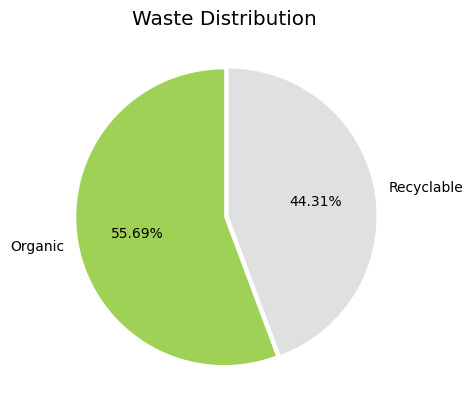

In [7]:
colors=['#a0d157','#1222']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'],autopct='%0.2f%%', colors= colors, startangle= 90, explode=[0.001, 0.03])
plt.rcParams.update({'font.size': 12})
plt.title("Waste Distribution")
plt.show()